# Pre-requisites and reading of files

In [1]:
import numpy as np
import pandas as pd

pd.set_option('float_format','{:f}'.format)

In [2]:
companies = pd.read_csv("../companies.txt",sep = "\t",encoding = "ISO-8859-1")

In [3]:
rounds2 = pd.read_csv("../rounds2.csv",sep = ",",encoding = "ISO-8859-1")

# Checkpoint 1


# Table 1.1

## How many unique companies are present in rounds2?

In [4]:
rounds2.drop_duplicates(['company_permalink']).shape[0]

90247

## How many unique companies are present in the companies file?

In [5]:
companies.drop_duplicates(['permalink']).shape[0]

66368

## Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [6]:
#converting key columns to merge to lowercase
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

#merging columns on permalink column
merged_dataset = pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')
merged_dataset.shape[0]

114942

# Cleaning dataset

In [7]:
#removing null values in raised_amount_usd column
merged_dataset = merged_dataset.dropna(subset=['raised_amount_usd'])
merged_dataset.shape[0]

94958



# Checkpoint 2
# Table 2.1
## Average funding amount of venture type


In [8]:
merged_dataset[(merged_dataset.funding_round_type == 'venture')].raised_amount_usd.mean()

11748949.129489528

## Average funding amount of angel type

In [9]:
merged_dataset[(merged_dataset.funding_round_type == 'angel')].raised_amount_usd.mean()

958694.4697530865

## Average funding amount of seed type

In [10]:
merged_dataset[(merged_dataset.funding_round_type == 'seed')].raised_amount_usd.mean()

719779.6202016778

## Average funding amount of private equity type

In [11]:
merged_dataset[(merged_dataset.funding_round_type == 'private_equity')].raised_amount_usd.mean()

73308593.02944215


# Checkpoint 3

# Table 3.1
## Top 9 countries in terms of raised_amount_usd


In [334]:
#removing null country_code rows, then grouping by country_code, and finding the sum, finally sorting in decscending order
top9 = merged_dataset[(merged_dataset.funding_round_type == 'venture')].dropna(subset=['country_code']).groupby(['country_code']).sum().sort_values(['raised_amount_usd'],ascending=False)[0:9]
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd
0,USA,422510842796.000000
1,CHN,39835418773.000000
2,GBR,20245627416.000000
3,IND,14391858718.000000
4,CAN,9583332317.000000
5,FRA,7259536732.000000
6,ISR,6907514579.000000
7,DEU,6346959822.000000
8,JPN,3363676611.000000


## Top 3 English Speaking countries:
### 1) USA
### 2) GBR
### 3) IND


# Checkpoint 4




In [22]:
mapping = pd.read_csv("../mapping.csv",sep = ",",encoding = "ISO-8859-1")

## Primary sectors for each company

In [93]:
#Removing null values in category_list
merged_dataset.dropna(subset = ['category_list'])

#Extracting only primary sectors for each company
merged_dataset.category_list = merged_dataset.category_list.str.split('|').str[0]
merged_dataset.category_list.head()


0                    Media
2    Application Platforms
3                     Apps
4              Curated Web
6                    Games
Name: category_list, dtype: object

## Main Sectors for category_list

In [77]:
# removing null values from category_list column
mapping = mapping.dropna(subset=['category_list'])

# converting given dataframe to a usable form using melt function
# conversion based on provided variable 'category_list'
new_mapping = pd.melt(mapping, id_vars=['category_list'])

# removing all rows with value = 0
new_mapping = new_mapping.loc[new_mapping.value==1,:].drop(columns=['value']).rename(index=str, columns={"variable": "main_sector"})
new_mapping.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


## Map each primary sector with one of 8 main sectors

In [79]:
mapped_df = pd.merge(merged_dataset,new_mapping,how='inner',left_on='category_list',right_on='category_list')
mapped_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.000000,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media,operating,USA,MT,Missoula,Missoula,31-07-2011,Entertainment


# Checkpoint 5
## Create 3 Dataframes D1,D2,D3, for 3 countries identified earlier
## Where funding falls between 5 to 15 million and of type = venture


In [120]:
D1 = mapped_df.loc[(mapped_df.country_code == 'USA') & (mapped_df.funding_round_type == 'venture') & ((mapped_df.raised_amount_usd >= 5000000) & (mapped_df.raised_amount_usd <=15000000))]
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.000000,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment
31,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.000000,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Entertainment
66,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.000000,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,Entertainment
67,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.000000,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,Entertainment
91,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.000000,/organization/matchmine,MatchMine,http://matchmine.com,Media,closed,USA,MA,Boston,Needham,01-01-2007,Entertainment


In [121]:
D2 = mapped_df.loc[(mapped_df.country_code == 'GBR') & (mapped_df.funding_round_type == 'venture') & ((mapped_df.raised_amount_usd >= 5000000) & (mapped_df.raised_amount_usd <=15000000))]
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
252,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.000000,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms,operating,GBR,H9,London,London,NaN,"News, Search and Messaging"
291,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.000000,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms,operating,GBR,C3,London,Cambridge,01-01-2013,"News, Search and Messaging"
292,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.000000,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms,operating,GBR,C3,London,Cambridge,01-01-2013,"News, Search and Messaging"


In [122]:
D3 = mapped_df.loc[(mapped_df.country_code == 'IND') & (mapped_df.funding_round_type == 'venture') & ((mapped_df.raised_amount_usd >= 5000000) & (mapped_df.raised_amount_usd <=15000000))]
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
759,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.000000,/organization/chillr-2,Chillr,http://chillr.in,Apps,operating,IND,13,Cochin,Cochin,22-12-2013,"News, Search and Messaging"
1241,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.000000,/organization/jugnoo,JUGNOO,https://jugnoo.in/#/,Apps,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,"News, Search and Messaging"
1638,/organization/peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.000000,/organization/peppertap,PepperTap,http://www.peppertap.com,Apps,operating,IND,10,New Delhi,Gurgaon,26-11-2014,"News, Search and Messaging"
2148,/organization/tinyowl-technology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.000000,/organization/tinyowl-technology,TinyOwl Technology,http://tinyowl.com/,Apps,operating,IND,16,Mumbai,Mumbai,NaN,"News, Search and Messaging"


# Table 5.1
# 1
## Total number of investments (count) for D1

In [143]:
D1.shape[0]

11149

## Total number of investments (count) for D2

In [144]:
D2.shape[0]

577

## Total number of investments (count) for D3

In [145]:
D3.shape[0]

299

# 2
## Total amount of investment (USD) for D1

In [146]:
D1.raised_amount_usd.sum()

99661524549.0

## Total amount of investment (USD) for D2

In [148]:
D2.raised_amount_usd.sum()

5028704358.0

## Total amount of investment (USD) for D3

In [147]:
D3.raised_amount_usd.sum()

2683537552.0

# 3
## Top Sector name (no. of investment-wise) for D1

In [165]:
D1[D1.main_sector!='Others'].groupby(['main_sector']).size().to_frame().idxmax()[0]

'Cleantech / Semiconductors'

## Top Sector name (no. of investment-wise) for D2

In [166]:
D2[D2.main_sector!='Others'].groupby(['main_sector']).size().to_frame().idxmax()[0]

'Cleantech / Semiconductors'

## Top Sector name (no. of investment-wise) for D3

In [196]:
D3[D3.main_sector!='Others'].groupby(['main_sector']).size().to_frame().idxmax()[0]

'News, Search and Messaging'

# 4
## Second Sector name (no. of investment-wise) for D1

In [170]:
D1[(D1.main_sector!='Others') & (D1.main_sector!='Cleantech / Semiconductors')].groupby(['main_sector']).size().to_frame().idxmax()[0]

'Social, Finance, Analytics, Advertising'

## Second Sector name (no. of investment-wise) for D2

In [171]:
D2[(D2.main_sector!='Others') & (D2.main_sector!='Cleantech / Semiconductors')].groupby(['main_sector']).size().to_frame().idxmax()[0]

'Social, Finance, Analytics, Advertising'

## Second Sector name (no. of investment-wise) for D3

In [197]:
D3[(D3.main_sector!='Others') & (D3.main_sector!='News, Search and Messaging')].groupby(['main_sector']).size().to_frame().idxmax()[0]

'Entertainment'

# 5
## Third Sector name (no. of investment-wise) for D1

In [174]:
D1[(D1.main_sector!='Others') & (D1.main_sector!='Cleantech / Semiconductors') & (D1.main_sector!='Social, Finance, Analytics, Advertising')].groupby(['main_sector']).size().to_frame().idxmax()[0]

'News, Search and Messaging'

## Third Sector name (no. of investment-wise) for D2

In [175]:
D2[(D2.main_sector!='Others') & (D2.main_sector!='Cleantech / Semiconductors') & (D2.main_sector!='Social, Finance, Analytics, Advertising')].groupby(['main_sector']).size().to_frame().idxmax()[0]

'News, Search and Messaging'

## Third Sector name (no. of investment-wise) for D3

In [198]:
D3[(D3.main_sector!='Others') & (D3.main_sector!='Entertainment') & (D3.main_sector!='News, Search and Messaging')].groupby(['main_sector']).size().to_frame().idxmax()[0]

'Social, Finance, Analytics, Advertising'

# 6
## Number of investments in top sector for D1

In [190]:
D1[D1.main_sector == 'Cleantech / Semiconductors'].shape[0]

2297

## Number of investments in top sector for D2

In [191]:
D2[D2.main_sector == 'Cleantech / Semiconductors'].shape[0]

127

## Number of investments in top sector for D3

In [199]:
D3[D3.main_sector == 'News, Search and Messaging'].shape[0]

52

# 7
## Number of investments in second sector for D1

In [193]:
D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].shape[0]

1912

## Number of investments in second sector for D2

In [194]:
D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].shape[0]

98

## Number of investments in second sector for D3

In [200]:
D3[D3.main_sector == 'Entertainment'].shape[0]

33

# 8
## Number of investments in third sector for D1

In [201]:
D1[D1.main_sector == 'News, Search and Messaging'].shape[0]

1563

## Number of investments in third sector for D2

In [202]:
D2[D2.main_sector == 'News, Search and Messaging'].shape[0]

73

## Number of investments in third sector for D3

In [203]:
D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].shape[0]

32

# 9
## For top sector, which compay recieved max investment for D1

In [219]:
max_val = D1[D1.main_sector == 'Cleantech / Semiconductors']['raised_amount_usd'].idxmax()
D1.loc[max_val]['name']

'480 Biomedical'

## For top sector, which compay recieved max investment for D2

In [220]:
max_val = D2[D2.main_sector == 'Cleantech / Semiconductors']['raised_amount_usd'].idxmax()
D2.loc[max_val]['name']

'Anadigm'

## For top sector, which compay recieved max investment for D3

In [221]:
max_val = D3[D3.main_sector == 'News, Search and Messaging']['raised_amount_usd'].idxmax()
D3.loc[max_val]['name']

'Mobile2Win India'

# 10
## For second best sector, which compay recieved max investment for D1

In [222]:
max_val = D1[D1.main_sector == 'Social, Finance, Analytics, Advertising']['raised_amount_usd'].idxmax()
D1.loc[max_val]['name']

'G5'

## For second best sector, which compay recieved max investment for D2

In [223]:
max_val = D2[D2.main_sector == 'Social, Finance, Analytics, Advertising']['raised_amount_usd'].idxmax()
D2.loc[max_val]['name']

'SimilarWeb'

## For second best sector, which compay recieved max investment for D3

In [224]:
max_val = D3[D3.main_sector == 'Entertainment']['raised_amount_usd'].idxmax()
D3.loc[max_val]['name']

'Moonfrog Labs'

# Checkpoint 6: Plotting the observations
## Plot 1 : A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [328]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,15)})

In [317]:
mean_vals = merged_dataset[(merged_dataset.raised_amount_usd>=5000000)&(merged_dataset.raised_amount_usd<=15000000)].groupby(['funding_round_type']).mean().reset_index()
mean_vals2 = merged_dataset.groupby(['funding_round_type']).size().to_frame().reset_index()
mean_vals = pd.merge(mean_vals,mean_vals2,how='inner',left_on='funding_round_type',right_on='funding_round_type')
mean_vals = mean_vals.rename(columns={ mean_vals.columns[2]: "investments_total" })
mean_vals

,funding_round_type,raised_amount_usd,investments_total
0,angel,7212354.763889,4860
1,convertible_note,8071730.125000,1447
2,debt_financing,8283572.194253,6682
3,equity_crowdfunding,6544840.739130,1228
4,grant,8546104.982659,2124
5,non_equity_assistance,15000000.000000,73
6,post_ipo_debt,8793381.676471,152
7,post_ipo_equity,9324944.907895,628
8,private_equity,9283495.678322,1936
9,product_crowdfunding,9158712.800000,386


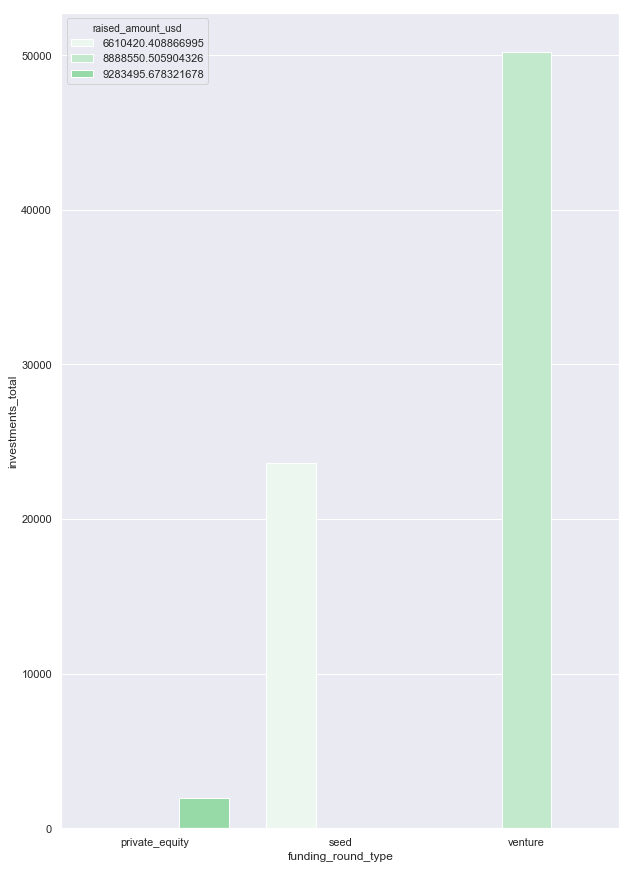

In [354]:
sns.set_color_codes("pastel")
plot1 = sns.barplot(x='funding_round_type',y='investments_total',hue='raised_amount_usd', data = mean_vals[(mean_vals.funding_round_type=='venture')|(mean_vals.funding_round_type=='seed')|(mean_vals.funding_round_type=='private_equity')], color="g")


## Plot 2 : A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [355]:
sns.set(rc={'figure.figsize':(15,15)})

In [340]:
top9

,country_code,raised_amount_usd
0,USA,422510842796.000000
1,CHN,39835418773.000000
2,GBR,20245627416.000000
3,IND,14391858718.000000
4,CAN,9583332317.000000
5,FRA,7259536732.000000
6,ISR,6907514579.000000
7,DEU,6346959822.000000
8,JPN,3363676611.000000


In [345]:
new_df = merged_dataset[(merged_dataset.funding_round_type == 'venture')].dropna(subset=['country_code']).groupby(['country_code']).size().to_frame().reset_index()
top9 = pd.merge(top9,new_df,how='inner',left_on='country_code',right_on='country_code')
top9 = top9.rename(columns={ top9.columns[2]: "investments_total" })
top9

,country_code,raised_amount_usd,investments_total,0_y
0,USA,422510842796.000000,36139,36139
1,CHN,39835418773.000000,1564,1564
2,GBR,20245627416.000000,2055,2055
3,IND,14391858718.000000,824,824
4,CAN,9583332317.000000,1256,1256
5,FRA,7259536732.000000,917,917
6,ISR,6907514579.000000,796,796
7,DEU,6346959822.000000,558,558
8,JPN,3363676611.000000,274,274


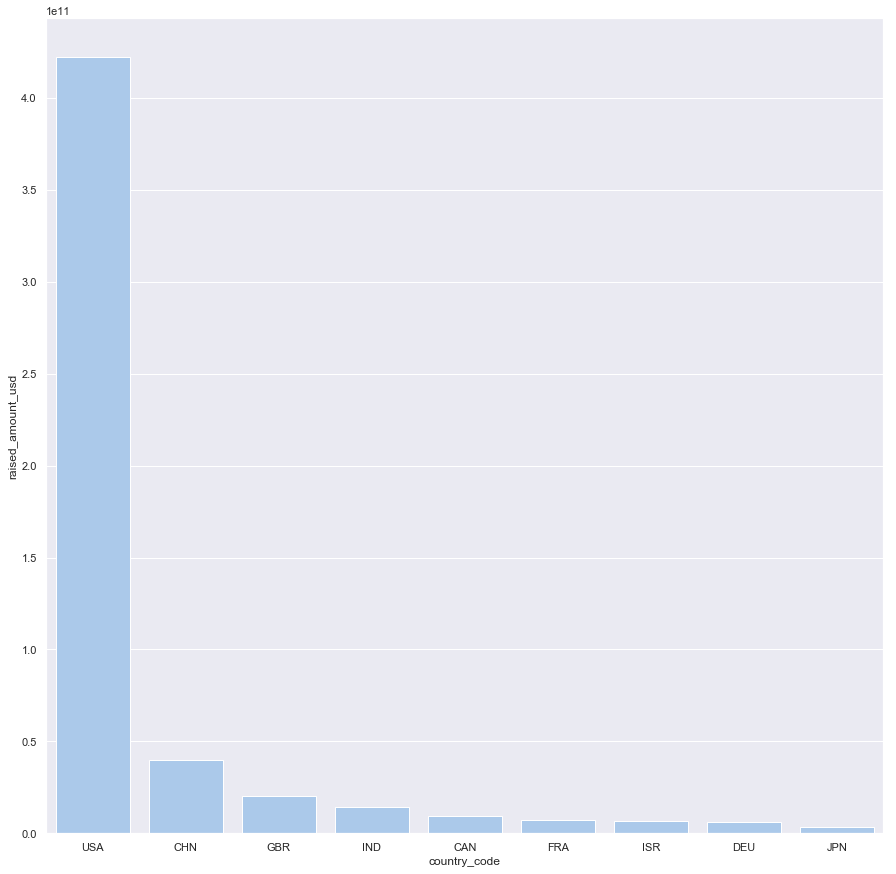

In [356]:
sns.set_color_codes("pastel")
sns.barplot(x="country_code", y="raised_amount_usd", data=top9,
            label="Total", color="b")


## Plot 3 : A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [355]:
sns.set(rc={'figure.figsize':(15,15)})

In [357]:
mapped_df[(mapped_df.country_code='USA')|(mapped_df.country_code='GBR')|(mapped_df.country_code='USA')]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.000000,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media,operating,USA,MT,Missoula,Missoula,31-07-2011,Entertainment
5,/organization/akira-mobile,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NaN,01-08-2012,18410.000000,/organization/akira-mobile,Akira Mobile,http://www.akira.lt/en,Media,operating,LTU,NaN,NaN,NaN,NaN,Entertainment
6,/organization/all-day-media,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,NaN,16-12-2014,2000000.000000,/organization/all-day-media,ALL DAY MEDIA,http://allday.com/,Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Entertainment
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.000000,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment
8,/organization/america-s-real-deal,/funding-round/5fbb191b97ca9789a7196de703983240,equity_crowdfunding,NaN,19-08-2011,670000.000000,/organization/america-s-real-deal,America's Real Deal,http://americasrealdeal.com/,Media,operating,USA,UT,Salt Lake City,Bountiful,03-04-2014,Entertainment
9,/organization/american-gnuity,/funding-round/07cc3eb3afd8ef5812e2b62b254b2040,equity_crowdfunding,NaN,19-08-2011,670000.000000,/organization/american-gnuity,American Gnuity,http://AmericanGnuity.com,Media,operating,USA,UT,Salt Lake City,Bountiful,03-04-2014,Entertainment
